Jared Crebo 30085839

PHYS 381: Assignment 2

The Pendulum problem

9 (Exercise) The damped-driven nonlinear pendulum

This script models the swing of a damped and driven pendulum via the nonlinear pendulum equation, which is solved numerically through the fourth-order Runge-Kutta algorithm. 

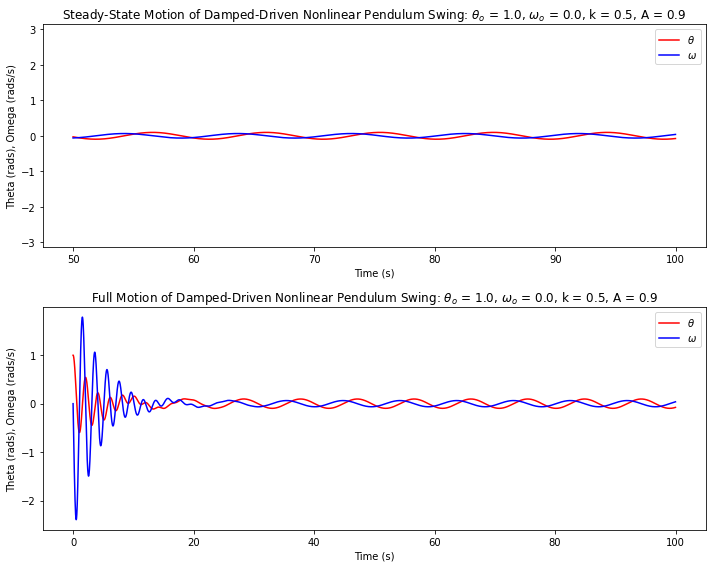

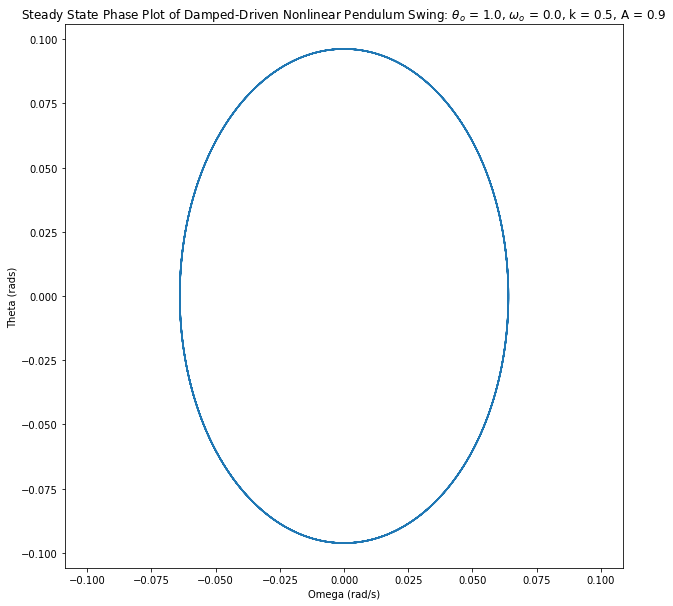

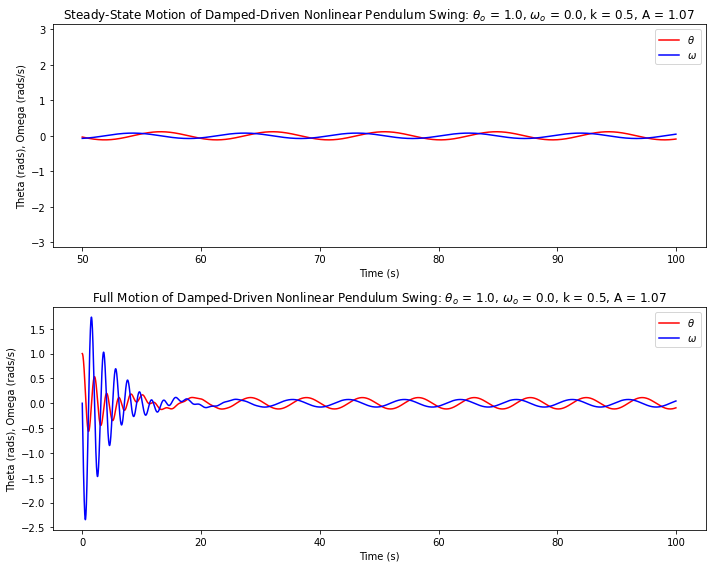

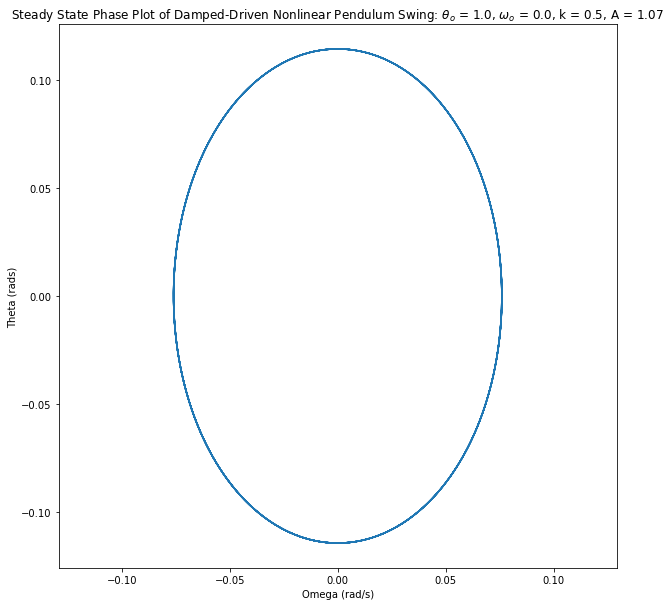

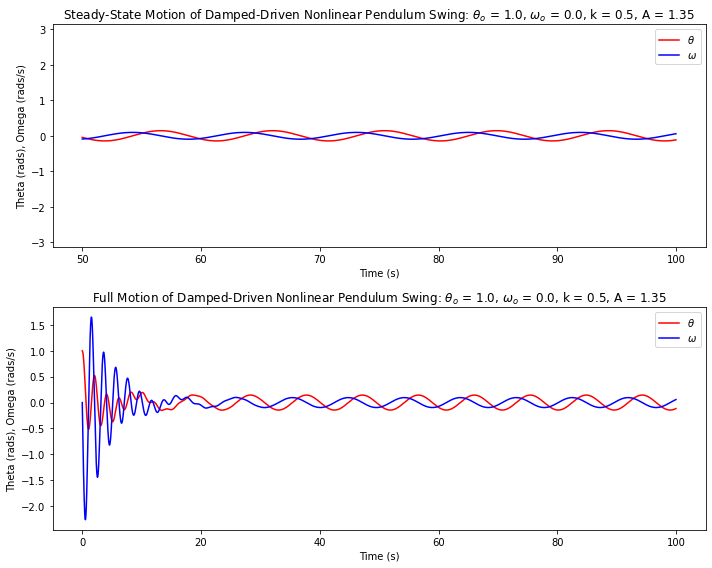

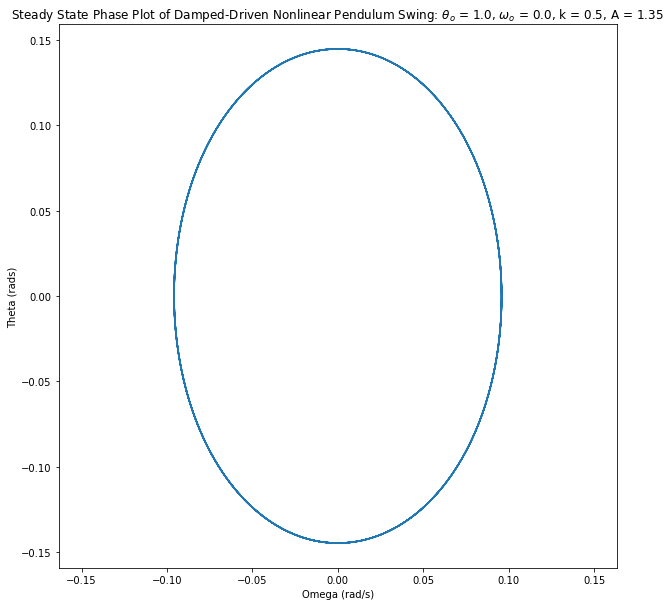

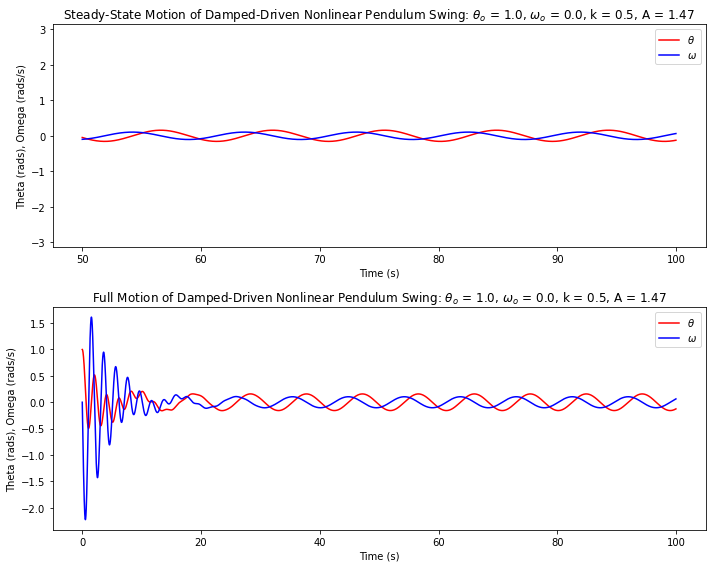

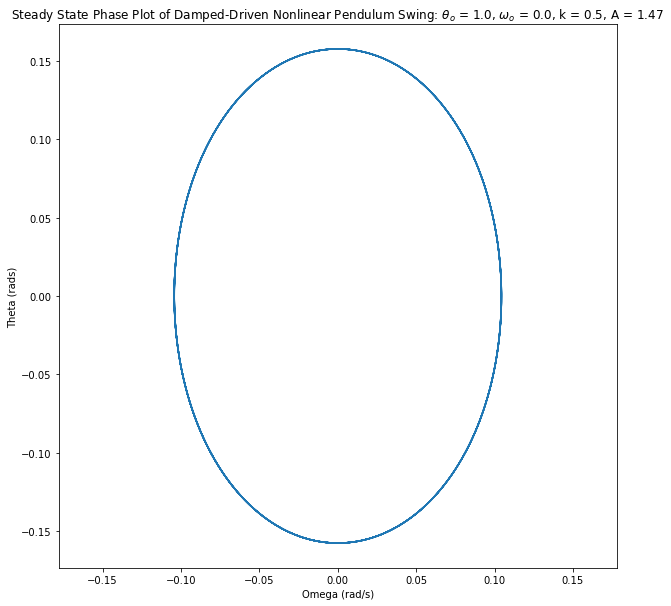

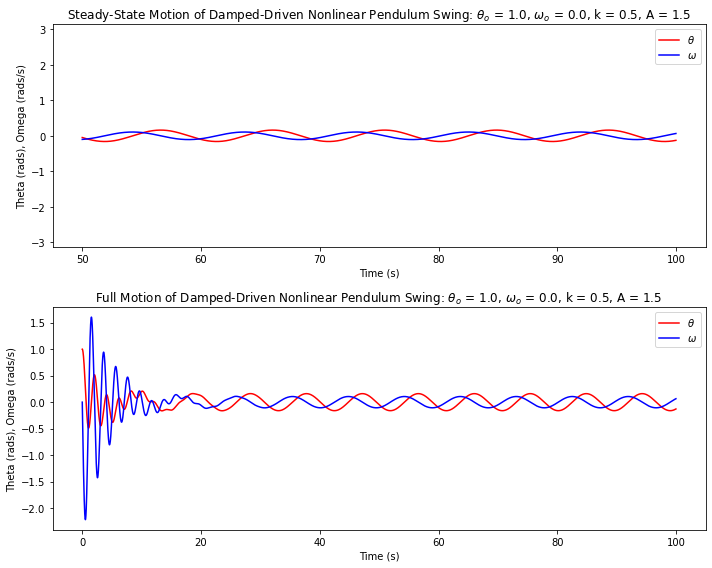

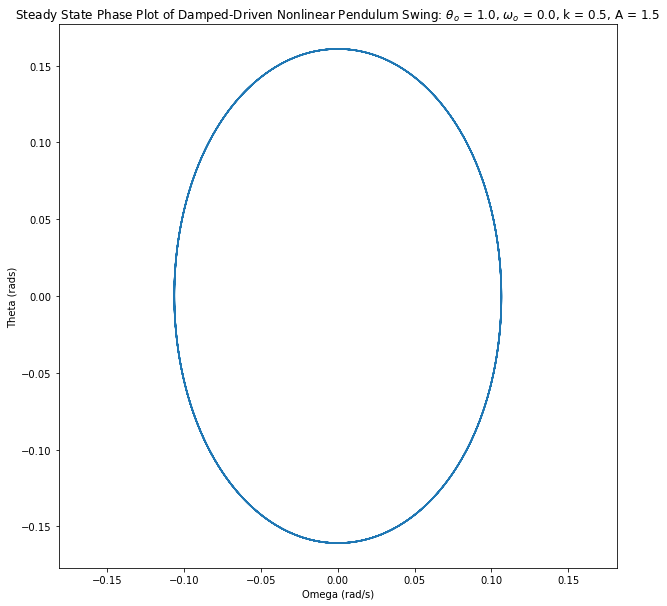

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import math

# Constant Parameters
transient = 5000 # no. timesteps until steady-state
g  = 9.81 # Acceleration of gravity (m/s^2)
L = 1 # Length of pendulum (m)
k = 0.5 # Stiffness coefficient (N/rad)
phi = 0.66667 # driving force frequency (rad/s)

def f_nonlin(theta, omega, t, A):
    '''
    Equation of motion of a nonlinear pendulum
    t - current time in seconds
    theta - current angle in rads
    omega - current angular velocity in rads/sec
    A - amplitude of the driving force in Newtons
    Function returns the angular acceleration of the current timestep
    '''
    return -g/L * math.sin(theta) - k*omega + A*math.cos(phi * t)

def plot_nonlinear_pendulum(theta1, omega1, A):
    '''
    Main solver function
    theta1 - initial angle in rads
    omega1 - intial angular velocity in rads/sec
    Function takes the initial conditions and returns a plot of the angle and angular velocity of the pendulum wrt time
    '''

    size = transient + 5000 # Number of timesteps
    # Initialize arrays to store angle, angular velocity, and time for plotting
    theta = np.zeros(size)
    omega = np.zeros(size)
    t = np.zeros(size)

    # Initialize first index of array to the initial conditions
    theta[0] = theta1
    omega[0] = omega1
    t[0] = 0.0
    # Set the timestep value (s)
    dt = 0.01

    for i in range(0,size-1,1):
        # For each current timestep, calculate the next angle and angular velocity of the pendulum based on data from the current timestep
        # Fourth Order Runge Kutta Method
        k1a = dt * omega[i]
        k1b = dt * f_nonlin(theta[i], omega[i], t[i], A)
        k2a = dt * (omega[i] + k1b/2)
        k2b = dt * f_nonlin(theta[i] + k1a/2, omega[i] + k1b/2, t[i] + dt/2, A)
        k3a = dt * (omega[i] + k2b/2)
        k3b = dt * f_nonlin(theta[i] + k2a/2, omega[i] + k2b/2, t[i] + dt/2, A)
        k4a = dt * (omega[i] + k3b)
        k4b = dt * f_nonlin(theta[i] + k3a, omega[i] + k3b, t[i] + dt, A)
        theta[i+1] = theta[i] + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
        omega[i+1] = omega[i] + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
        t[i+1] = t[i] + dt
        # If a full rotation occurs, decrease/increase theta by 2pi to keep within visible bounds for plotting
        if theta[i+1] > 2*math.pi:
            theta[i+1] += -2*math.pi
        elif theta[i+1] < -2*math.pi:
            theta[i+1] += 2*math.pi

    # Plotting steady state and full motion of pendulum swing wrt time
    fig, ax = plt.subplots(2,1,figsize=[10,8])
    ax[0].plot(t[transient:-1],theta[transient:-1],color='red',label='$\\theta $') # plot steady state angle vs time
    ax[0].plot(t[transient:-1],omega[transient:-1],color='blue',label='$\omega $') # plot steady state angular velocity vs time
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Theta (rads), Omega (rads/s)")
    ax[0].set_title("Steady-State Motion of Damped-Driven Nonlinear Pendulum Swing: $\\theta_o$ = " + str(theta1) + ", $\omega_o$ = " + str(omega1) + ", k = 0.5, A = " + str(A))
    ax[0].set_ylim((-math.pi, math.pi))
    ax[0].legend()
    ax[1].plot(t[0:-1],theta[0:-1],color='red',label='$\\theta $') # plot total angle vs time
    ax[1].plot(t[0:-1],omega[0:-1],color='blue',label='$\omega $') # plot total angular velocity vs time
    ax[1].set_xlabel("Time (s)")
    ax[1].set_ylabel("Theta (rads), Omega (rads/s)")
    ax[1].set_title("Full Motion of Damped-Driven Nonlinear Pendulum Swing: $\\theta_o$ = " + str(theta1) + ", $\omega_o$ = " + str(omega1) + ", k = 0.5, A = " + str(A))
    ax[1].legend()
    fig.tight_layout()

    # Plotting phase planes
    fig, ax = plt.subplots(figsize=[10,10])
    ax.plot(omega[transient:-1],theta[transient:-1]) # plot steady state phase plot (theta vs omega)
    ax.set_xlabel("Omega (rad/s)")
    ax.set_ylabel("Theta (rads)")
    ax.set_title("Steady State Phase Plot of Damped-Driven Nonlinear Pendulum Swing: $\\theta_o$ = " + str(theta1) + ", $\omega_o$ = " + str(omega1) + ", k = 0.5, A = " + str(A))
    ax.axis('equal')

# Plot the motion of a nonlinear pendulum with the initial conditions (theta, omega)
plot_nonlinear_pendulum(1.0, 0.0, 0.9)
plot_nonlinear_pendulum(1.0, 0.0, 1.07)
plot_nonlinear_pendulum(1.0, 0.0, 1.35)
plot_nonlinear_pendulum(1.0, 0.0, 1.47)
plot_nonlinear_pendulum(1.0, 0.0, 1.5)